In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
from scipy.stats import multivariate_normal
from numpy.linalg import inv

#Generating 10 points

In [3]:
def generate_10_points_with_gausian_noise(w0,w1):
    x_coordinates=np.linspace(start=-1,stop=1,num=10)
    y_coordinates=[]
    for x in x_coordinates:
        gaussian_error=np.random.normal(0,0.04)
        y=w0+w1*x+gaussian_error
        y_coordinates.append(y)
    return x_coordinates,y_coordinates
def generate_10_points(w0,w1):
    x_coordinates=np.linspace(start=-1,stop=1,num=10)
    y_coordinates=[]
    for x in x_coordinates:
        y=w0+w1*x
        y_coordinates.append(y)
    return x_coordinates,y_coordinates

In [4]:
x,y=generate_10_points_with_gausian_noise(-0.3,0.5)
x_true,y_true=generate_10_points(-0.3,0.5)

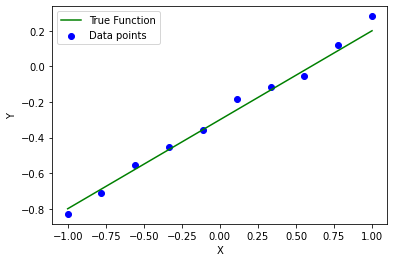

In [5]:
plt.scatter(x,y,color='blue',label='Data points')
plt.plot(x_true,y_true,color='green',label='True Function')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

#Bayesian Regression

In [7]:
import random

In [8]:
def gausian_function(x,mean,variance):
  mu=mean
  sigma=math.sqrt(variance)
  y=(1/(sigma*math.sqrt(2*np.pi)))*((np.exp([1])[0])**(-0.5*(((x-mu)/sigma)**2)))
  return y


In [9]:
def prior_grid_calc(w0_values,w1_values,mean,variance):
    prior_grid=np.zeros((len(w0_values),len(w0_values)))
    for i in range(len(w0_values)):
        for j in range(len(w1_values)):    
            prior_grid[i][j]= multivariate_normal.pdf([w0_values[i],w1_values[j]],[mean,mean], [[variance,0],[0,variance]])
    return prior_grid

In [10]:

def likelihood_grid_calc(w0_values,w1_values,x,y):
    likelihood_grid=np.zeros((len(w0_values),len(w0_values)))
    for i in range(len(w0_values)):
        for j in range(len(w1_values)):    
              for k in range(len(x)):   
                probablity_for_single_point=gausian_function(y[k],w0_values[i]+w1_values[j]*x[k],0.04)
                if(k==0):
                  likelihood_grid[i][j]=probablity_for_single_point
                else:
                  likelihood_grid[i][j]=likelihood_grid[i][j]*probablity_for_single_point
    return likelihood_grid

In [11]:
def posterior_grid_calc(prior_grid,likelihood_grid):
    posterior_grid=likelihood_grid * prior_grid 
    return posterior_grid

In [12]:
w0_values = np.array(np.linspace(-1,1,100));
w1_values = np.array(np.linspace(-1,1,100));


In [13]:
def pick_10_lines(m0,s0,beta,phi,t):
    phi = np.array(phi).reshape(1, 2)
    sn = inv(inv(s0) + beta*(np.transpose(phi)@phi))
    m0 = np.array(m0).reshape(2, 1)
    t = [t]
    mn = sn@(inv(s0)@m0 + beta*(np.transpose(phi).reshape(2, 1)@t))
    mn = list(mn.reshape(1, 2)[0])
    w0,w1=np.random.multivariate_normal(mn, sn, 10).T
    return w0,w1,mn,sn

<Figure size 432x288 with 0 Axes>

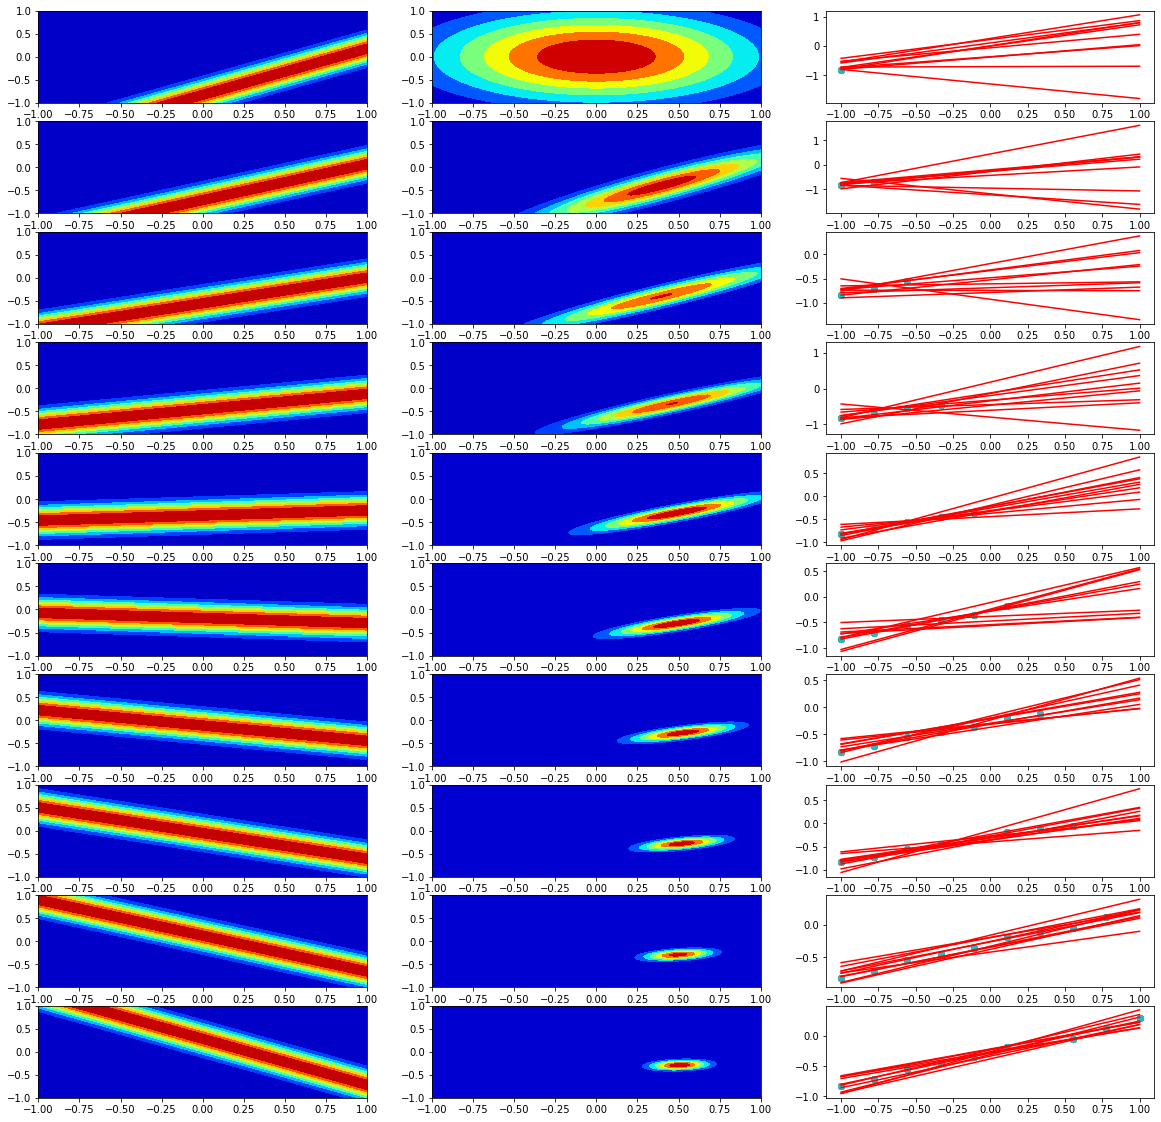

In [20]:
fig = plt.figure()
m0=np.array([0,0])
s0=[[0.5,0],[0,0.5]]
prior_grid=prior_grid_calc(w0_values,w1_values,0,0.5)
prior_grid
count=0
x_points=np.linspace(-1,1,10)
fig,axs= plt.subplots(10,3,figsize=(20,20))
for i in range(len(x)):
    x_sub=[x[i]]
    y_sub=[y[i]]
    x_total=x[:i+1]
    y_total=y[:i+1]
    phi =[1,x[i]]
    likelihood_grid=likelihood_grid_calc(w0_values,w1_values,x_sub,y_sub)
    posterior_grid=posterior_grid_calc(prior_grid,likelihood_grid)
    w0,w1,mn,sn=pick_10_lines(m0,s0,25,phi,y_sub)
    axs[count,0].contourf(w0_values,w1_values,likelihood_grid,cmap="jet")
    axs[count,1].contourf(w0_values,w1_values,prior_grid,cmap="jet")
    for i in range(len(w0)):
        axs[count,2].plot(x_points,w0[i]+w1[i]*x_points,color="red")
        axs[count,2].scatter(x_total,y_total)
    m0=mn
    s0=sn
    prior_grid=posterior_grid
    count+=1